### **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###Analyzing mnist dataset 
To proceed further with the convoution, it is always necessary to have a better understanding of how the dataset looks and what could be the prediction dataset.

(60000, 28, 28)


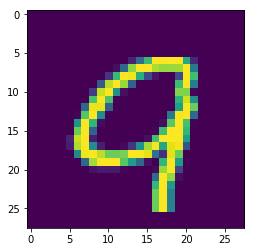

In [18]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
plt.imshow(X_train[15])
plt.imshow(X_train[500])
plt.imshow(X_train[3000])

###Image Normalization


In [19]:
# example of standardizing a image dataset

# reshape dataset to have a single channel
width, height, channels = X_train.shape[1], X_train.shape[2], 1
X_train = X_train.reshape((X_train.shape[0], width, height, channels))
X_test = X_test.reshape((X_test.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# # demonstrate effect on a single batch of samples
# iterator = datagen.flow(X_train, y_train, batch_size=64)
# # get a batch
# batchX, batchy = iterator.next()
# # pixel stats in the batch
# print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

X_train=batchX
y_train=batchy

Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


We also need to analyzing the Class array and 'one-hot-encode' them to so that our model could make more sense out of it. 

We can see the sample of class array below:

In [21]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

after processing, we can see that the value of 5 is replaced by an array which signifies its value by keeping 1 in the 6th place (array starts by index 0) and rest of the array as 0.

In [23]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

###Building the Model

###UPDATE from Third Iteration:

We have again made 2 updates on the Third iteration:
- reduced the number of channels in "layer 5" to 10 channels so that we can keep the number of parameters beow 15000.
- We are now set the learning rate to 0.003 and reducing at a steady on every epoch.

In [24]:
from keras.layers import Activation, BatchNormalization
from keras.regularizers import l2
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.01), input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))) # 22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, 1, 1, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))) # 11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001))) #7
# model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ip

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 16)        0         
__________

###Compiling the model

Here I am using *adam* optimizer, where I have also used the learning rate 0.002 an momentum as 0.9 so that the model converges slowly to the minima and we see less variance in the accuracy after each epoch.

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003*1/(1+.319*epoch),10)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])


###Training the model


In [27]:
from keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount("/content/gdrive")

filepath="/content/gdrive/My Drive/MyCNN/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"

checkpoint=ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

model.fit(X_train, Y_train, batch_size=128, nb_epoch=40, verbose=1, validation_data=(X_test,Y_test), callbacks=[LearningRateScheduler(scheduler,verbose=1), checkpoint])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 12s 197us/step - loss: 0.2968 - acc: 0.9320 - val_loss: 3.5083 - val_acc: 0.7614

Epoch 00001: val_acc improved from -inf to 0.76140, saving model to /content/gdrive/My Drive/MyCNN/epochs:001-val_acc:0.761.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 117us/step - loss: 0.1227 - acc: 0.9777 - val_loss: 0.7839 - val_acc: 0.9455

Epoch 00002: val_acc improved from 0.76140 to 0.94550, saving model to /content/gdrive/My Drive/MyCNN/epochs:002-val_acc:0.946.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 117us/step - loss: 0.0983 - acc: 0.9812 - val_loss: 0.5519 - val_acc: 0.9606

Epoch 00003: val_acc improved from 0.94550 to 0.96060

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [29]:
print(score)

[0.31976907752752304, 0.9755]


In [0]:
y_pred = model.predict(X_test)

In [0]:
(TrainX,TrainY),(TestX,TestY)=mnist.load_data()

In [46]:
# print(y_pred[:9])

unmatched_indices = [np.argmax(k) for k in y_pred[:10000]]-y_test[:10000] != 0

print(unmatched_indices)
print(y_test[:10000])

unmatched_images = (TestX[:10000])[unmatched_indices] 
unmatched_pred= np.array(arr_x1)[unmatched_indices]

[False False False ... False False False]
[7 2 1 ... 4 5 6]


(60000, 28, 28)


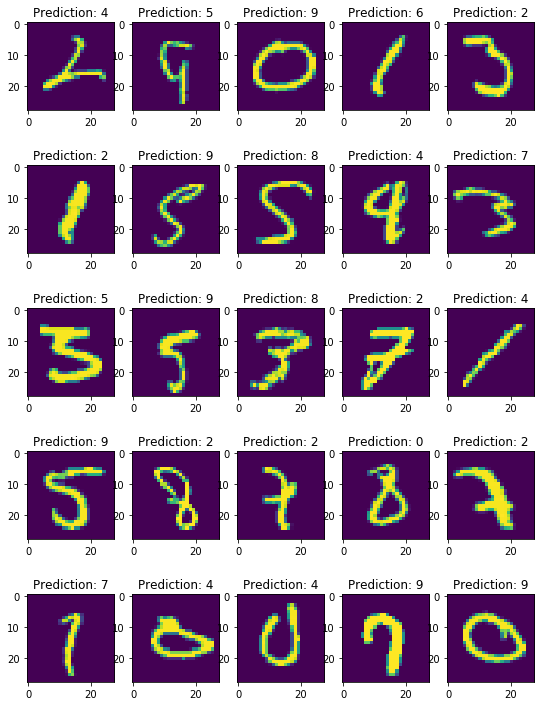

In [59]:
print (TrainX.shape)
from matplotlib import pyplot as plt
%matplotlib inline

for k in range(25):
  plt.subplot(5, 5, k+1)
  plt.margins(.1)
  plt.imshow(unmatched_images[k])
  plt.title("Prediction: %d" % (unmatched_pred[k]))
 
plt.subplots_adjust(bottom=.1, right=1.3, top=2.5)

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()